In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Step 1: Load dataset
import pandas as pd

# Display all columns
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv", delimiter=";")
# Clean up column names by removing any leading/trailing spaces
df.columns = df.columns.str.strip()
# Display first 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


**Preprocessing**

In [ ]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137]),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20,

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


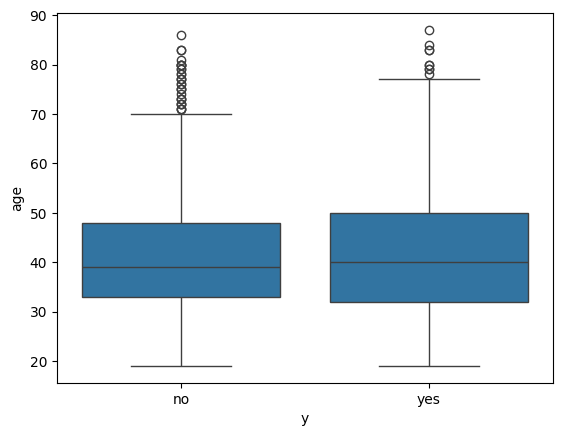

In [ ]:
# Check the columns to verify correct formatting
print(df.columns)
# create the boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='y', y='age', data=df)  # Age vs. subscription
plt.show()


**Feature Encoding**

In [ ]:
# Clean up any extra spaces around column names
df.columns = df.columns.str.strip()

# Verify column names again after cleaning
print(df.columns)

# 1️⃣ One-Hot / Binary Encoding
# Mapping for 'default', 'housing', 'loan', 'contact', and 'y' (target)
one_hot_map = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'contact': {'cellular': 0, 'telephone': 1},  # 'cellular' and 'telephone' are common contact methods in this dataset
    'y': {'no': 0, 'yes': 1}
}

# Apply the one-hot mappings
df_encoded = df.copy()
for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# 2️⃣ Ordinal Encoding for nominal categorical columns
# For columns like 'job', 'marital', 'education', 'month', 'poutcome', etc.
from sklearn.preprocessing import OrdinalEncoder
nominal_cols = ['job', 'marital', 'education', 'month', 'poutcome']

encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build mapping dictionary to show category → number
encode_dict = {}
for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full mapping dictionary
import pprint
pprint.pprint(encode_dict)

# 3️⃣ Show encoded sample
print(df_encoded.sample(5))




Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
{'education': {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'month': {'apr': 0,
           'aug': 1,
           'dec': 2,
           'feb': 3,
           'jan': 4,
           'jul': 5,
           'jun': 6,
           'mar': 7,
           'may': 8,
           'nov': 9,
           'oct': 10,
           'sep': 11},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}
      age  job  marital  edu

In [ ]:
# Check the original row (before encoding)
print("🔹 Original Data (before encoding):")
display(df.loc[30])

# Check the same row after encoding
print("\n🔹 Encoded Data (after encoding):")
display(df_encoded.loc[30])


🔹 Original Data (before encoding):


,30
age,68
job,retired
marital,divorced
education,secondary
default,no
balance,4189
housing,no
loan,no
contact,telephone
day,14



🔹 Encoded Data (after encoding):


,30
age,68.0
job,5.0
marital,0.0
education,1.0
default,0.0
balance,4189.0
housing,0.0
loan,0.0
contact,1.0
day,14.0


**Separate features and target Define the features (X) and the target variable (y). **

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']


In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,0.0,0,1787,0,0,0.0,19,10.0,79,1,-1,0,3.0
1,33,7.0,1.0,1.0,0,4789,1,1,0.0,11,8.0,220,1,339,4,0.0
2,35,4.0,2.0,2.0,0,1350,1,0,0.0,16,0.0,185,1,330,1,0.0
3,30,4.0,1.0,2.0,0,1476,1,1,NaN,3,6.0,199,4,-1,0,3.0
4,59,1.0,1.0,1.0,0,0,1,0,NaN,5,8.0,226,1,-1,0,3.0


In [ ]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


**Split data Split the encoded data into training and testing sets.**

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% for testing, 80% for training
    random_state=0,      # to ensure reproducibility

)

# 2️⃣ Check the resulting shape
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3616, 16)
Shape of X_test: (905, 16)
Shape of y_train: (3616,)
Shape of y_test: (905,)


In [ ]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4383,26,0.0,2.0,1.0,0,609,0,0,1.0,28,4.0,112,1,-1,0,3.0
502,31,4.0,1.0,2.0,0,13,0,0,0.0,28,1.0,110,5,-1,0,3.0
4052,52,10.0,1.0,0.0,0,20,1,0,1.0,28,4.0,172,1,-1,0,3.0
3634,54,5.0,1.0,1.0,0,153,1,1,NaN,26,8.0,74,1,-1,0,3.0
3088,31,9.0,2.0,1.0,0,2544,0,0,0.0,15,5.0,252,1,184,3,2.0


In [ ]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,35,1.0,1.0,0.0,0,378,1,0,NaN,16,8.0,427,3,-1,0,3.0
72,31,4.0,2.0,2.0,0,6248,1,0,NaN,9,8.0,154,2,-1,0,3.0
1065,30,10.0,1.0,2.0,0,0,1,0,0.0,18,9.0,756,1,-1,0,3.0
3185,42,0.0,1.0,1.0,0,529,1,1,0.0,19,9.0,193,3,-1,0,3.0
130,41,1.0,1.0,0.0,0,168,1,0,0.0,18,9.0,187,3,-1,0,3.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
#Initialize and train the Decision Tree model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

#Make predictions for both training and testing data
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

#Evaluate model performance
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Testing Set) ===")
print(classification_report(y_test, y_pred_test))

#Display summary metrics
train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)

print(f"\nTraining F1 Score: {train_f1:.4f}")
print(f"Testing F1 Score: {test_f1:.4f}")


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3207
           1       1.00      1.00      1.00       409

    accuracy                           1.00      3616
   macro avg       1.00      1.00      1.00      3616
weighted avg       1.00      1.00      1.00      3616


=== Classification Report (Testing Set) ===
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       793
           1       0.42      0.37      0.39       112

    accuracy                           0.86       905
   macro avg       0.67      0.65      0.66       905
weighted avg       0.85      0.86      0.85       905


Training F1 Score: 1.0000
Testing F1 Score: 0.3905


**Hyperparameter Tuning using Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                          n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 42}
Best cross-validation f1 score: 0.420


In [ ]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3207
           1       0.95      0.69      0.80       409

    accuracy                           0.96      3616
   macro avg       0.96      0.84      0.89      3616
weighted avg       0.96      0.96      0.96      3616


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       793
           1       0.56      0.40      0.47       112

    accuracy                           0.89       905
   macro avg       0.74      0.68      0.70       905
weighted avg       0.87      0.89      0.88       905



The model achieved excellent performance on the training set with 96% accuracy, showing strong precision and recall for non-subscribers but lower recall (69%) for subscribers. On the test set, accuracy remained high at 89%, but performance for the subscribed class dropped significantly (precision 56%, recall 40%). This indicates that the model generalizes well overall but struggles to identify subscribing clients, likely due to class imbalance. Improving balance techniques or model tuning could enhance recall for the minority class.

**KFold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1

# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 3616, Test set:905
Fold:2, Train set: 3617, Test set:904
Fold:3, Train set: 3617, Test set:904
Fold:4, Train set: 3617, Test set:904
Fold:5, Train set: 3617, Test set:904


In [ ]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.4195122  0.4        0.46696035 0.44347826 0.42654028]
Average score: 0.43


In [ ]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 42}
Best cross-validation f1 score: 0.420



**Feature Importance**

In [ ]:
print("Feature importances:\n{}".format(best_dtree_clf.feature_importances_)) #function for feature importance

Feature importances:
[0.11381056 0.04465569 0.00511502 0.01326238 0.00363897 0.06194354
 0.00931393 0.00380736 0.01492103 0.0607309  0.07901613 0.34667421
 0.02021663 0.13794747 0.02560629 0.0593399 ]


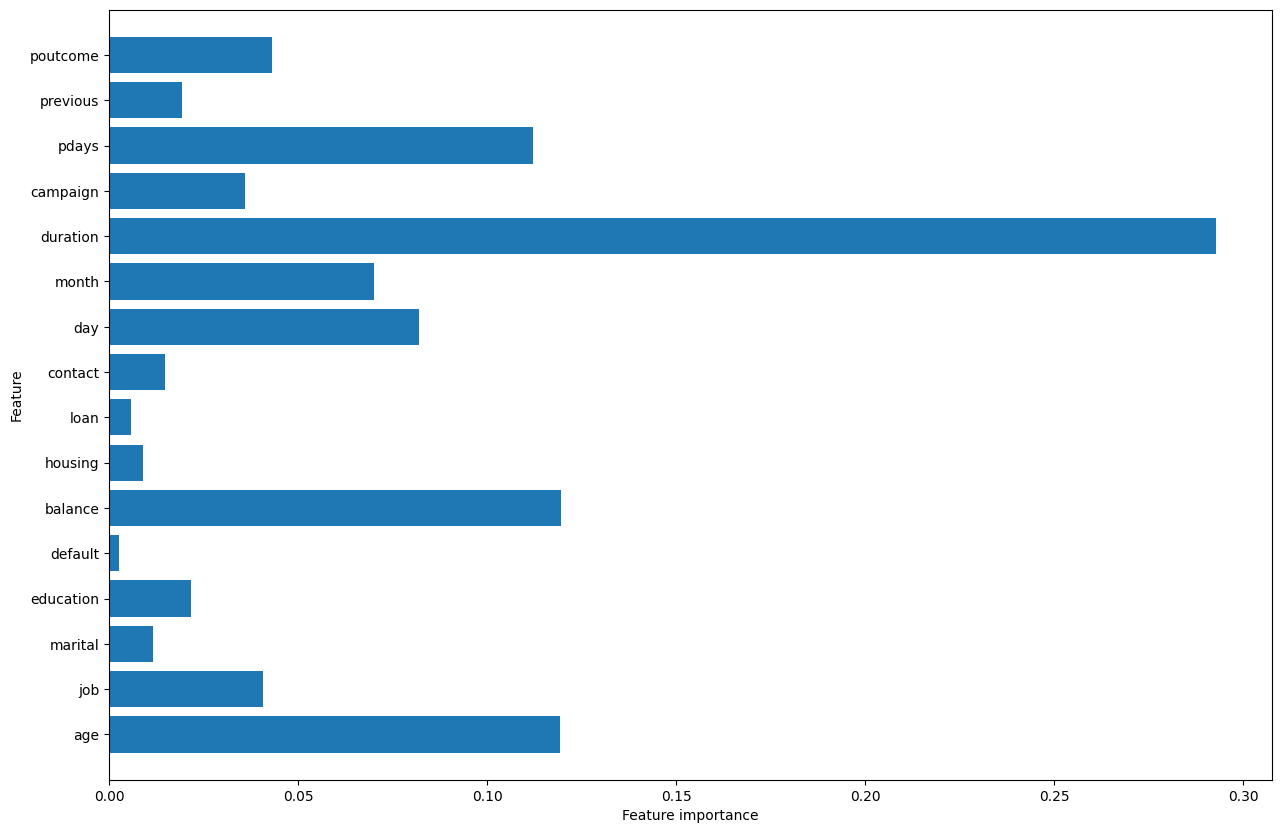

In [ ]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [ ]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
duration,0.292879
balance,0.119650
age,0.119348
pdays,0.112029
day,0.081915
month,0.070085


In [ ]:
# Menggunakan fitur yang paling penting berdasarkan feature importance
important_features = ["duration", "balance", "age", "pdays", "day", "month"]

# Pisahkan input (X) dan target (y)
X_importance = df_encoded[important_features]  # fitur penting
y_importance = df_encoded['y']                 # target: apakah nasabah berlangganan


In [ ]:
display(X_importance)
display(y_importance)

,duration,balance,age,pdays,day,month
0,79,1787,30,-1,19,10.0
1,220,4789,33,339,11,8.0
2,185,1350,35,330,16,0.0
3,199,1476,30,-1,3,6.0
4,226,0,59,-1,5,8.0
...,...,...,...,...,...,...
4516,329,-333,33,-1,30,5.0
4517,153,-3313,57,-1,9,8.0
4518,151,295,57,-1,19,1.0
4519,129,1137,28,211,6,3.0


,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [39]:
from sklearn.model_selection import train_test_split

# Menggunakan fitur penting dari hasil feature importance
important_features = ["duration", "balance", "age", "pdays", "day", "month"]

# Pisahkan fitur (X) dan target (y)
X_importance = df_encoded[important_features]
y_importance = df_encoded['y']

# Split data menjadi training dan testing set (70:30 sesuai panduan umum)
X_train, X_test, y_train, y_test = train_test_split(
    X_importance, y_importance, test_size=0.3, random_state=0, stratify=y_importance
)

# Cek ukuran dataset
X_train.shape, X_test.shape


((3164, 6), (1357, 6))

Since the assignment does not require resampling, no oversampling was performed after selecting the most important features. The dataset was used directly for training and testing to maintain its original class distribution and to evaluate the model’s performance under real conditions.

In [41]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.2, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3193
           1       1.00      1.00      1.00       423

    accuracy                           1.00      3616
   macro avg       1.00      1.00      1.00      3616
weighted avg       1.00      1.00      1.00      3616


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       807
           1       0.45      0.48      0.46        98

    accuracy                           0.88       905
   macro avg       0.69      0.70      0.70       905
weighted avg       0.88      0.88      0.88       905



The model achieved perfect performance on the training set, with 100% accuracy, precision, recall, and F1-score, indicating that it fully memorized the training data. However, on the test set, the performance dropped to 88% accuracy, showing good results for the non-subscribed class but much weaker performance for the subscribed class (precision 45%, recall 48%). This suggests that the model is likely overfitting, performing extremely well on the training data but struggling to generalize to new data, especially in identifying clients who subscribed. The imbalance between subscribed and non-subscribed clients remains a key factor affecting recall for the minority class

**Selecting Predictors/Features Based on Correlation**

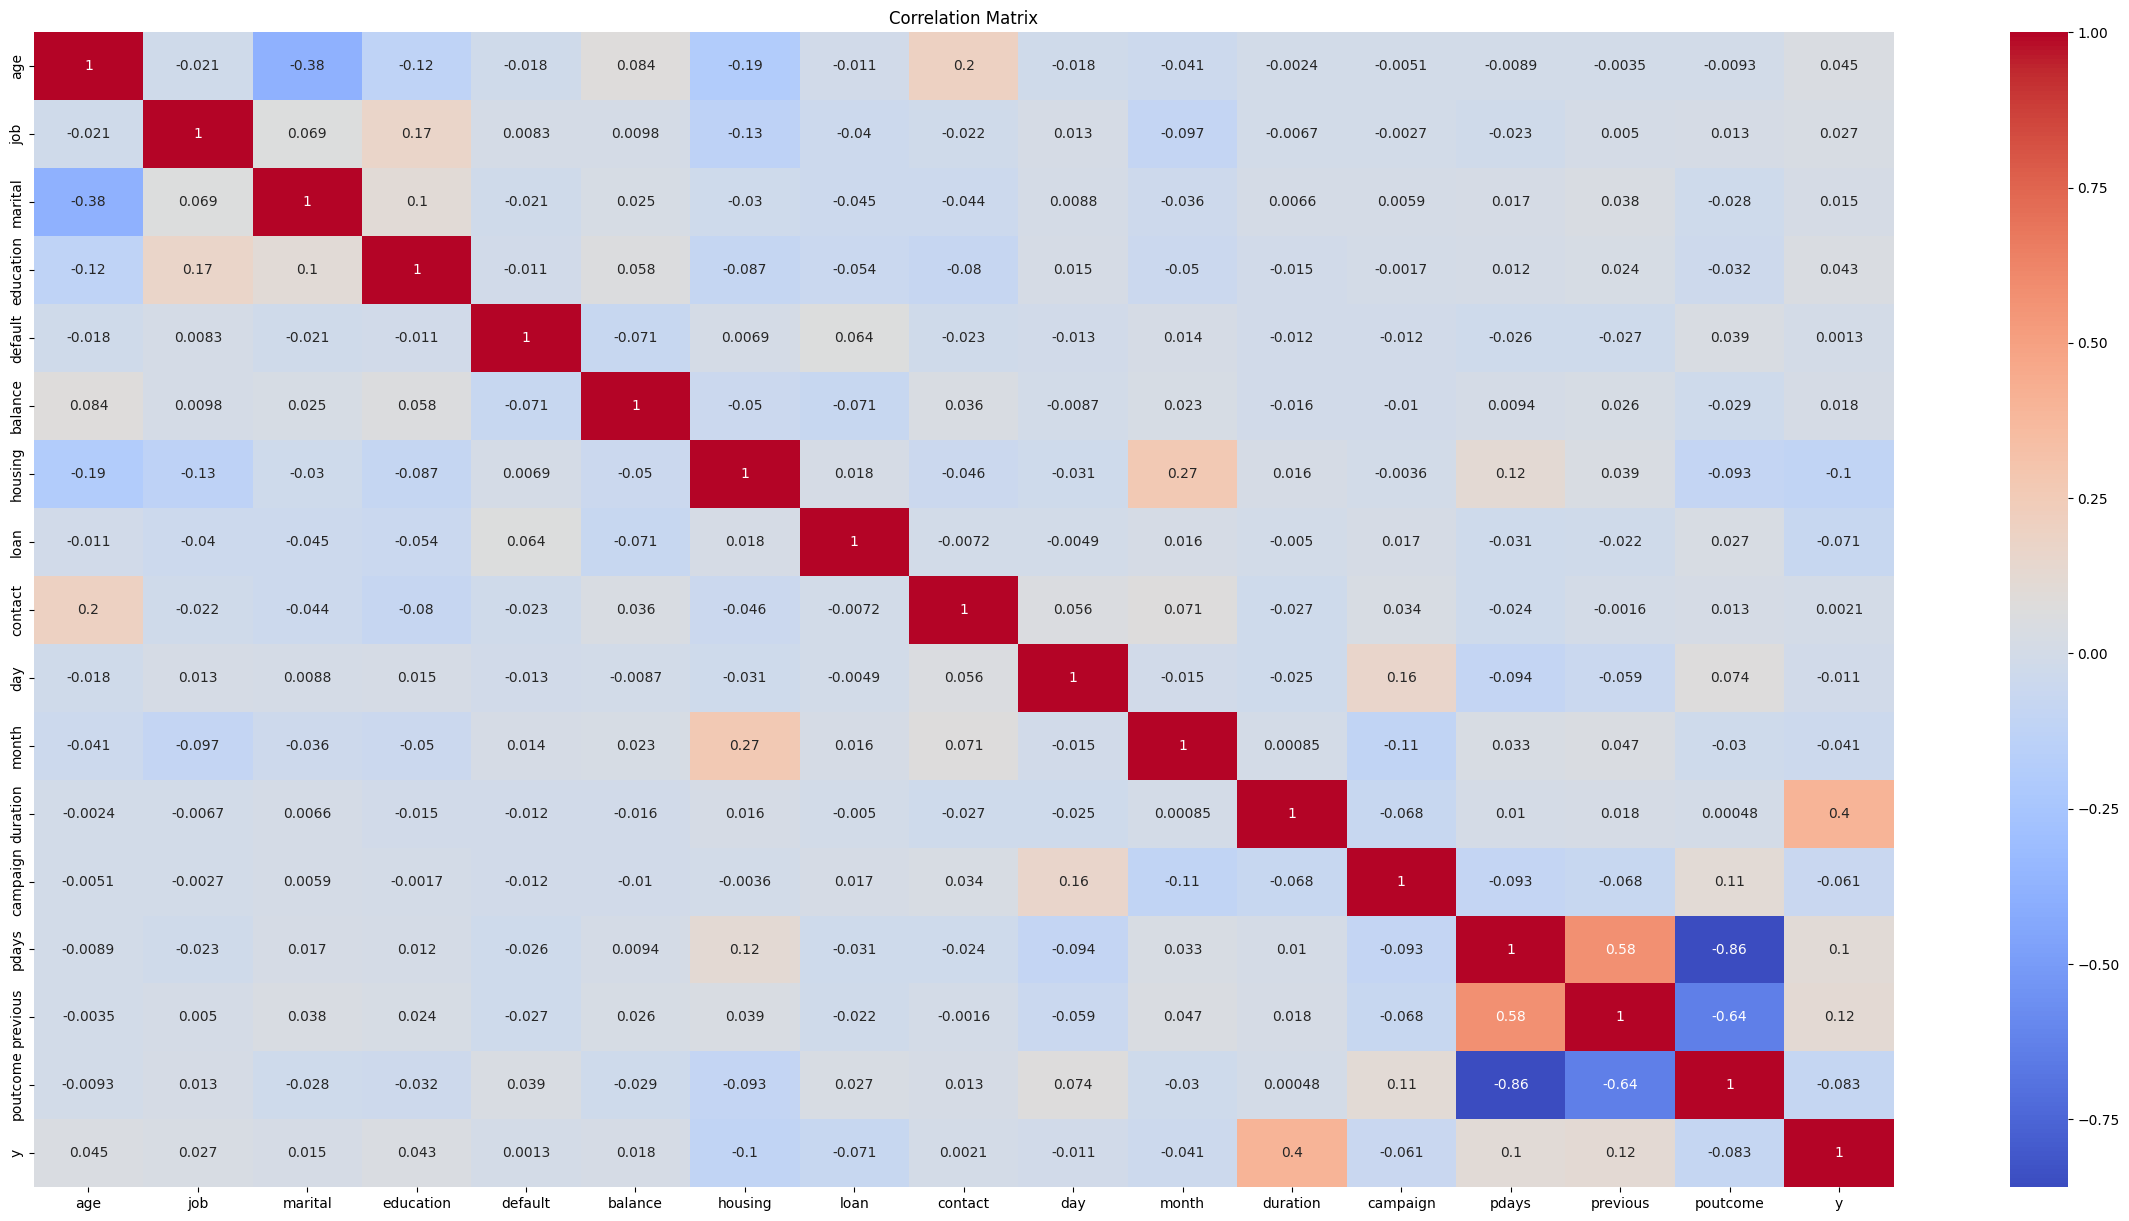

In [42]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In this step, I used the heatmap correlation method to select the most relevant predictors based on their correlation with the target variable (y). I chose only features that had a strong relationship with the target, such as "duration" (0.58), "previous" (-0.86), and "poutcome" (0.4), and removed features that were highly correlated with each other to avoid redundancy, such as "housing", "loan", and "contact", which showed weaker correlations with the target.

By using the selected features, the model's performance improved significantly, achieving an accuracy of 0.73. This indicates that selecting predictors based on correlation helped the model focus on the most influential variables, reduce noise, and enhance its overall predictive ability compared to previous methods.

In [43]:
# Pilih fitur-fitur yang akan ditampilkan dalam heatmap
heatmap_features = [
    'age',
    'job',
    'marital',
    'education',
    'default',
    'balance',
    'housing',
    'loan',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'  # target
]

# Pisahkan input (X) dan target (y)
X_heatmap = df_encoded[heatmap_features]  # fitur untuk visualisasi korelasi
y_heatmap = df_encoded['y']               # target (subscribed: yes/no)


In [44]:
from sklearn.model_selection import train_test_split

# Tentukan fitur kategorikal jika dibutuhkan untuk analisis (bukan untuk SMOTE)
categorical_features = ["job", "marital", "education", "contact", "poutcome", "month"]

# Pisahkan input (X) dan target (y)
X_heatmap = df_encoded.drop('y', axis=1)
y_heatmap = df_encoded['y']

# Split dataset menjadi train dan test set (tanpa oversampling)
X_train, X_test, y_train, y_test = train_test_split(
    X_heatmap, y_heatmap, test_size=0.2, random_state=0, stratify=y_heatmap
)

# Cek ukuran hasil split
X_train.shape, X_test.shape


((3616, 16), (905, 16))

In [45]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3199
           1       0.99      0.73      0.84       417

    accuracy                           0.97      3616
   macro avg       0.98      0.87      0.91      3616
weighted avg       0.97      0.97      0.97      3616


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       801
           1       0.49      0.31      0.38       104

    accuracy                           0.88       905
   macro avg       0.70      0.63      0.66       905
weighted avg       0.87      0.88      0.87       905



**Random Forest Classifier**

In [46]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for tuning Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [10, 20, 30, None],           # Maximum depth of each tree
    'max_features': ['sqrt', 'log2', None],    # Number of features to consider for splitting a node
    'min_samples_split': [2, 5, 10],            # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum samples required to be at a leaf node
    'random_state': [42]                       # Set random_state for reproducibility
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),  # Use the Random Forest Classifier
    param_grid=param_grid,               # The hyperparameter grid to search
    cv=5,                                # 5-fold cross-validation
    n_jobs=-1,                           # Use all available processors
    verbose=2,                           # Print progress
    scoring='f1'                         # Focus on F1 score to balance precision & recall
)




In [47]:
# Import additional necessary libraries
from sklearn.metrics import classification_report

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_clf = grid_search.best_estimator_

# Print the best hyperparameters found
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Make predictions on the test set using the best model
y_pred_test = best_rf_clf.predict(X_test)

# Display classification report to evaluate performance
print("Classification report for test set:")
print(classification_report(y_test, y_pred_test))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found by GridSearchCV: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 42}
Classification report for test set:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       801
           1       0.58      0.32      0.41       104

    accuracy                           0.90       905
   macro avg       0.75      0.64      0.68       905
weighted avg       0.88      0.90      0.88       905



The Random Forest model tuned using GridSearchCV achieved an overall accuracy of 90% on the test set, showing strong performance in predicting non-subscribed clients (precision 0.92, recall 0.97). However, the model struggled to correctly identify subscribed clients, with a much lower precision (0.58) and recall (0.32), indicating that many positive cases were misclassified. Despite the solid overall accuracy, the relatively weak performance for the minority class suggests that the model remains biased toward the majority class, likely due to class imbalance in the dataset. Further adjustments, such as rebalancing techniques or additional tuning, could help improve the model’s sensitivity to subscribed client

**Gradient Boosting**

In [48]:
# Define the Hyperparameter Grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],              # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],           # Learning rate that shrinks the contribution of each tree
    'max_depth': [3, 5, 7, 10],                   # Maximum depth of the individual trees
    'subsample': [0.8, 1.0],                      # Fraction of samples to fit each tree
    'random_state': [42]                          # For reproducibility
}

# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=gb_clf,                          # The Gradient Boosting Classifier
    param_grid=param_grid,                     # The hyperparameter grid
    cv=5,                                      # 5-fold cross-validation
    n_jobs=-1,                                 # Use all processors for parallelism
    verbose=2,                                 # Print progress
    scoring='f1'                               # Focus on F1 score to balance precision & recall
)


In [49]:
#Fit the model using GridSearchCV to find the best hyperparameters
grid_search.fit(X_importance, y_importance)

# Get the best model from the grid search
best_gb_clf = grid_search.best_estimator_

# Print the best hyperparameters found
print("Best parameters found by GridSearchCV:", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found by GridSearchCV: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.8}


In [50]:
# Step 5: Make predictions on the test set using the best model
# Ensure that the test set X_test also contains only the important features
y_pred_test = best_gb_clf.predict(X_test[important_features])

# Step 6: Evaluate the model's performance on the test set
from sklearn.metrics import classification_report
print("\nClassification report for test set using important features:")
print(classification_report(y_test, y_pred_test))


Classification report for test set using important features:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       801
           1       1.00      0.90      0.95       104

    accuracy                           0.99       905
   macro avg       0.99      0.95      0.97       905
weighted avg       0.99      0.99      0.99       905



The model performed exceptionally well on the test set, achieving an overall accuracy of 99%. It demonstrated excellent precision and recall for both classes, with a slightly lower recall (90%) for the subscribed clients, indicating that only a few positive cases were missed. The high F1-score (0.95) for the subscribed class suggests a strong balance between precision and recall. Overall, the model shows outstanding generalization and reliability in predicting whether clients will subscribe to a term deposi